In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# own functions 
from emelab_tools import *

# Paths
path = r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\EMELAB\SIMCE'
EE_path = r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\TESIS\MINEDUC'
path_cned = r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\EMELAB\SIMCE\CNED\Cuadros_resumen'
path_esup = r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\TESIS\MINEDUC\ESUP'

# years and grade levels per cohort
dict_agno_curso = {
    1: [[2005,2009,2012], [4,8,11]],
    2: [[2007, 2011, 2013], [4, 8, 10]],
    3: [[2008, 2014], [4, 10]],
    4: [[2009, 2013, 2015], [4, 8, 10]],
    5: [[2010, 2014, 2016], [4, 8, 10]],
    6: [[2011, 2013, 2015, 2017], [4, 6, 8, 10]],
    7: [[2012, 2014, 2018], [4, 6, 10]],
    8: [[2013, 2015, 2017], [4, 6, 8]],
    9: [[2012, 2014, 2016], [2, 4, 6]],
    10:[[2013, 2015, 2019], [2, 4, 8]],
    11: [[2014, 2016, 2018,2022], [2, 4, 6, 10]]
}

# Apariciones por cohorte
n_app = [3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 4]

# year cohorts in grade 2
agno_in_2b = [
    2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 1998, 
    2004, 2015, 2000, 1994, 2001, 2002, 2016
]

# years cohorts in grade 1 (truncated)
agno_in_1b = [x -1 for x in agno_in_2b]

# years cohorts in grade 4 
agno_in_4b = [x + 2 for x in agno_in_2b]

# years cohorts in grade (full)
cohort_1b = [2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]

In [112]:
panel_total = pd.read_csv(r'Datos\Finales\20231129_panel_total_2002_2022.csv', low_memory=False)

In [113]:
T6 = panel_total[panel_total.agno_grade1_enrolled == 2008]

In [114]:
dict_agno_curso[6]

[[2011, 2013, 2015, 2017], [4, 6, 8, 10]]

In [115]:
T6_simce = T6[((T6.agno == 2011) & (T6.curso == '4b')) | 
             ((T6.agno == 2013 ) & (T6.curso == '6b')) | 
             ((T6.agno == 2015) & (T6.curso == '8b')) | 
             ((T6.agno == 2017) & (T6.curso == '2m')) ]

In [116]:
pd.crosstab(T6_simce.agno, T6_simce.curso)

curso,2m,4b,6b,8b
agno,,,,
2011.0,0,201541,0,0
2013.0,0,0,191755,0
2015.0,0,0,0,180893
2017.0,159667,0,0,0


<Axes: xlabel='agno'>

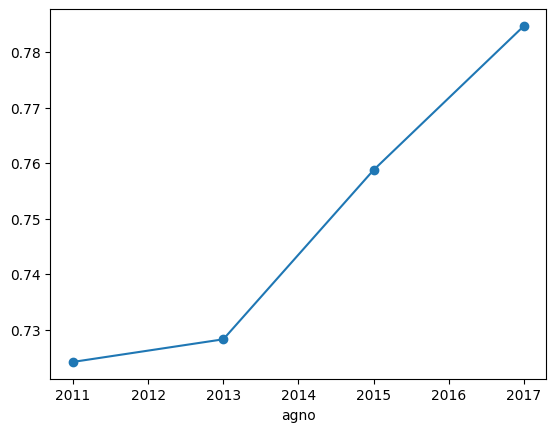

In [117]:
T6_simce.groupby(['agno']).parental_exp_college_or_more.mean().plot(marker = 'o')

# Figura general

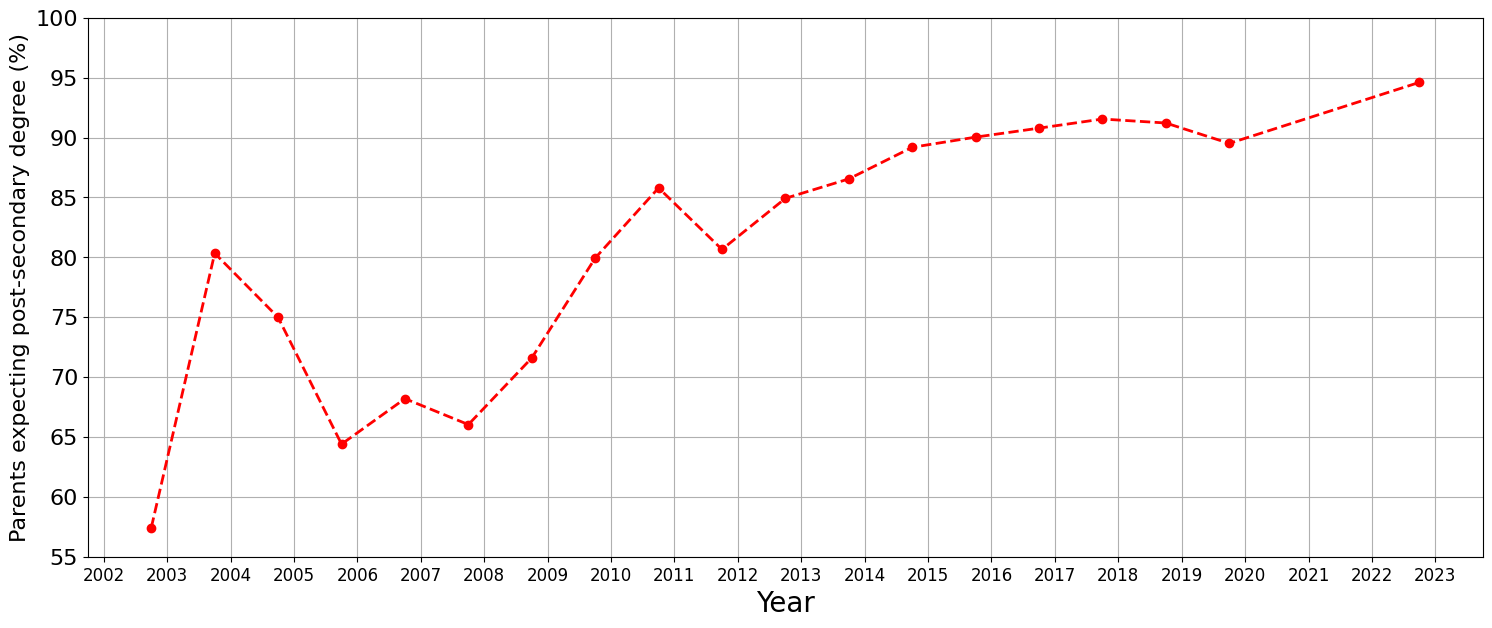

In [118]:
fig, ax = plt.subplots(figsize=(18,7))
data_2 = panel_total[['agno','parental_exp_cc_or_more']].groupby(['agno'], as_index = False).mean()
data_2['agno'] = data_2.agno + 0.75

ax.plot(data_2.agno,100*data_2.parental_exp_cc_or_more, 'o', c='red',lw=6)
ax.plot(data_2.agno,100*data_2.parental_exp_cc_or_more, '--', c='red',lw=2)
plt.xticks(range(2002,2024), fontsize = 12)
plt.yticks(fontsize = 16)
plt.grid(True)
plt.ylim(55,100)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Parents expecting post-secondary degree (%)', fontsize = 16)

plt.savefig('Figuras\Figura1_promedio_anual_simple.png', dpi = 200)
plt.show()

# Figura general por curso

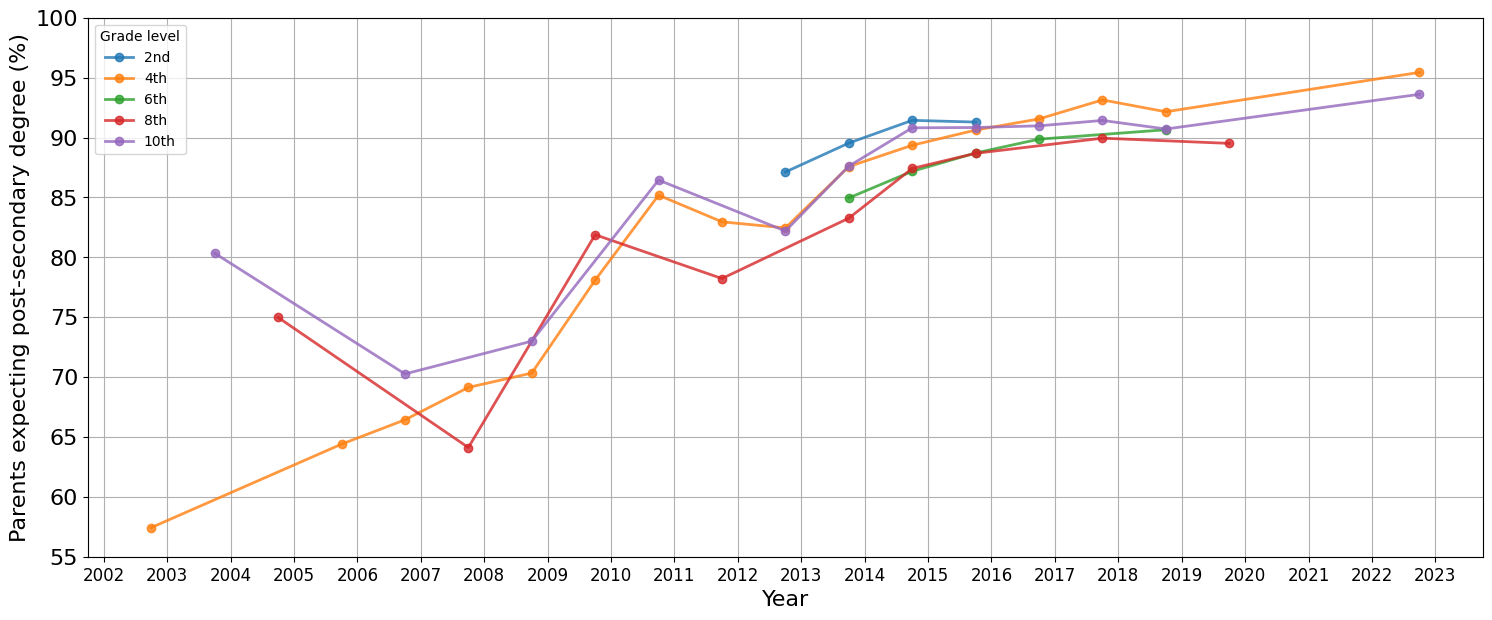

In [119]:
fig, ax = plt.subplots(figsize=(18,7))
grade_english = {'2b':'2nd','4b':'4th','6b':'6th','8b':'8th','2m':'10th','3m':'11th'}
for c in ['2b','4b','6b','8b','2m']:
    data_curso = panel_total[panel_total.curso == c]
    df = data_curso[['agno','parental_exp_cc_or_more']].groupby(['agno'], as_index=False).mean()
    df['parental_exp_cc_or_more'] = 100*df.parental_exp_cc_or_more
    
    df['agno'] = df.agno + 0.75   
    ax.plot(df.agno, df.parental_exp_cc_or_more,'-o',lw=2, label = grade_english[c], alpha = 0.8)
    
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Parents expecting post-secondary degree (%)', fontsize = 16)

plt.ylim([55,100])
plt.legend(title = 'Grade level', fontsize = 10)
plt.grid()
plt.yticks(fontsize = 16)
plt.xticks(range(2002,2024),fontsize = 12)
plt.savefig('Figuras\Figura2_promedio_anual_simple_cursos.png', dpi = 200)
plt.show()

# Figura general por cohorte

## Formar data de cohortes

In [120]:
grade_numeric_str = {2:'2b',4:'4b',6:'6b',8:'8b',10:'2m',11:'3m'}
i = 0
panel_11cohortes = pd.DataFrame()
for cohort, years_grade_levels in dict_agno_curso.items():
    print(cohort)
    years, grade_levels = years_grade_levels
    cohort_data = pd.DataFrame()
    for year, grade_level in zip(years, grade_levels):
        # Filter data for a particular year and grade level
        filtered_data = panel_total[(panel_total['agno'] == year) & (panel_total['curso'] == grade_numeric_str[grade_level])]
        cohort_data = pd.concat([cohort_data,filtered_data])
        
    cohort_data = cohort_data[cohort_data.agno_grade1_enrolled == cohort_1b[i]]
    panel_11cohortes = pd.concat([panel_11cohortes,cohort_data])
    i+=1

1
2
3
4
5
6
7
8
9
10
11


In [121]:
panel_11cohortes.agno_grade1_enrolled.value_counts().sort_index()

agno_grade1_enrolled
2002.0    590352
2004.0    565394
2005.0    370831
2006.0    547308
2007.0    557122
2008.0    733856
2009.0    558657
2010.0    563601
2011.0    590165
2012.0    585820
2013.0    763522
Name: count, dtype: int64

In [122]:
# add curso numeric 
panel_11cohortes['curso_numeric'] = panel_11cohortes.curso
panel_11cohortes.curso_numeric.replace('2b',2,inplace=True)
panel_11cohortes.curso_numeric.replace('4b',4,inplace=True)
panel_11cohortes.curso_numeric.replace('6b',6,inplace=True)
panel_11cohortes.curso_numeric.replace('8b',8,inplace=True)
panel_11cohortes.curso_numeric.replace('2m',10,inplace=True)
panel_11cohortes.curso_numeric.replace('3m',11,inplace=True)

## Gráfico general por cohorte

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\180875572.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores_deg = cm.get_cmap('coolwarm',n_colors)


2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013


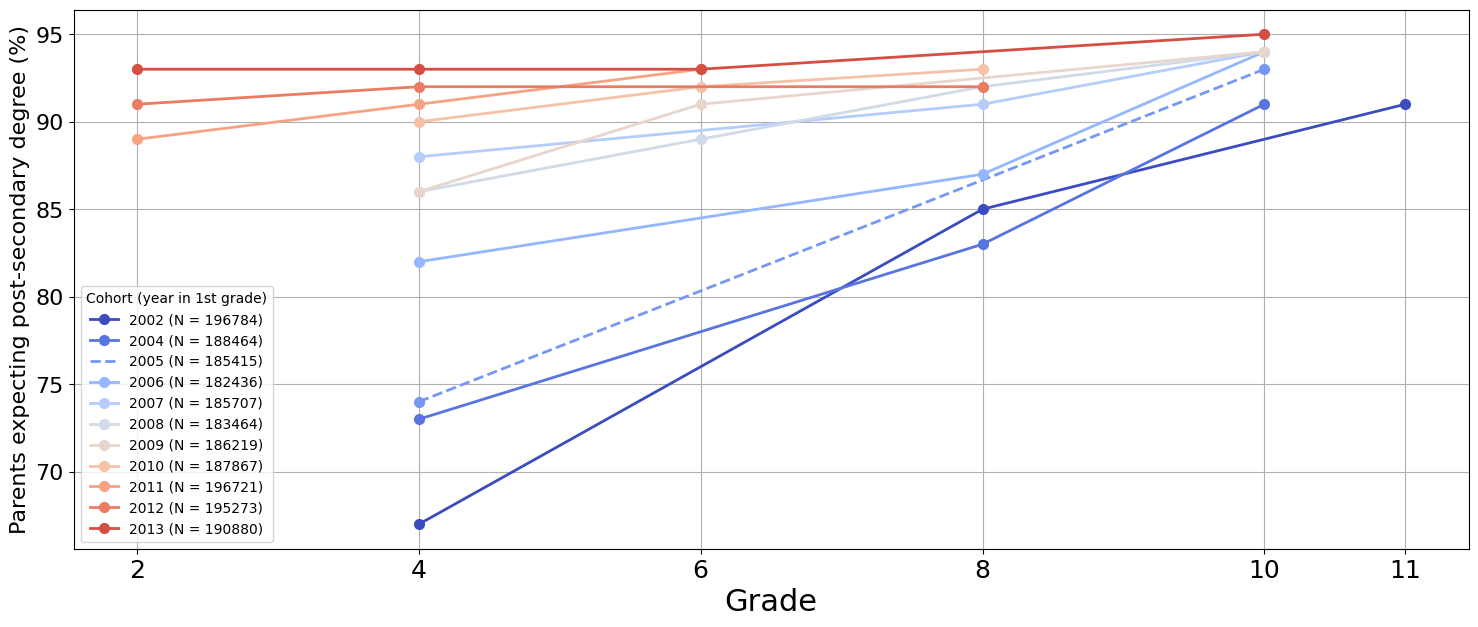

In [123]:
n_colors = 12
colores_deg = cm.get_cmap('coolwarm',n_colors)

N_cohorts = []
fig, ax = plt.subplots(figsize=(18,7))
c = 1
for a in range(2002,2014):
    print(a)
    if a != 2003:
        data_curso = panel_11cohortes[panel_11cohortes.agno_grade1_enrolled == a]
        N = len(data_curso)/n_app[c-1]
        N_cohorts = N_cohorts + [N]
        df = data_curso[['parental_exp_cc_or_more','curso_numeric']].groupby(['curso_numeric'], as_index=False).mean()
        if c != 3:
            ax.plot(df.curso_numeric, np.round(100*df.parental_exp_cc_or_more),'-o',ms=7, lw=2,  label =  str(agno_in_1b[c-1]) + ' (N = ' + str(int(N)) + ')',c = colores_deg(c-1))
        else:
            ax.plot(df.curso_numeric, np.round(100*df.parental_exp_cc_or_more),'--',ms=7, lw=2,  label =  str(agno_in_1b[c-1]) + ' (N = ' + str(int(N)) + ')',c = colores_deg(c-1))
            ax.plot(df.curso_numeric, np.round(100*df.parental_exp_cc_or_more),'o',ms=7, lw=2,c = colores_deg(c-1))
        c+=1
    
plt.xticks([2,4,6,8,10,11], fontsize = 18)
plt.yticks(fontsize = 16)

#plt.ylim([70,95])
plt.xlabel('Grade', fontsize = 22)
plt.ylabel('Parents expecting post-secondary degree (%)', fontsize = 16)

plt.legend(title = 'Cohort (year in 1st grade)', fontsize = 10)
plt.grid(which='both')
plt.savefig('Figuras\Figura3_longitudinal_por_cohorte.png', dpi = 200)
plt.show()

## Gráfico por NSE

In [124]:
panel_11cohortes.columns

Index(['agno', 'curso', 'idalumno', 'mrun', 'rbd', 'in_simce',
       'agno_grade1_enrolled', 'merge1_data_tot_mrun_MAT_1b_data_acum',
       'parental_exp', 'income', 'mom_ed', 'dad_ed', 'respondant',
       'respondant_age', 'mom_ed_grouped', 'dad_ed_grouped',
       'income_decil_casen', 'income_quintil_casen', 'income_uf',
       'income_quintil_uf', 'income_p40_p80_uf', 'parental_exp_cc_or_more',
       'parental_exp_college_or_more', 'cod_curso', 'simce_mat', 'simce_lect',
       'simce_mat_norm2002', 'simce_lect_norm2002',
       'merge2_panel_parents_panel_alu', 'student_expectations',
       'student_exp_coordinada', 'merge3_panel_parents_panel_alu_asp',
       'cod_depe', 'rural_rbd', 'cod_com_rbd', 'cod_reg_rbd', 'p1_porcentaje',
       'IVE', 'gen_alu', 'HS_type', 'prom_gral', 'asistencia', 'sit_fin',
       'ranking_group', 'GPA_percentil',
       'merge4_panel_parents_panel_alu_asp_rend', 'GPA_quintil', 'income_4b',
       'income_decil_casen_4b', 'income_quintil_casen_4b

### Quintiles CASEN

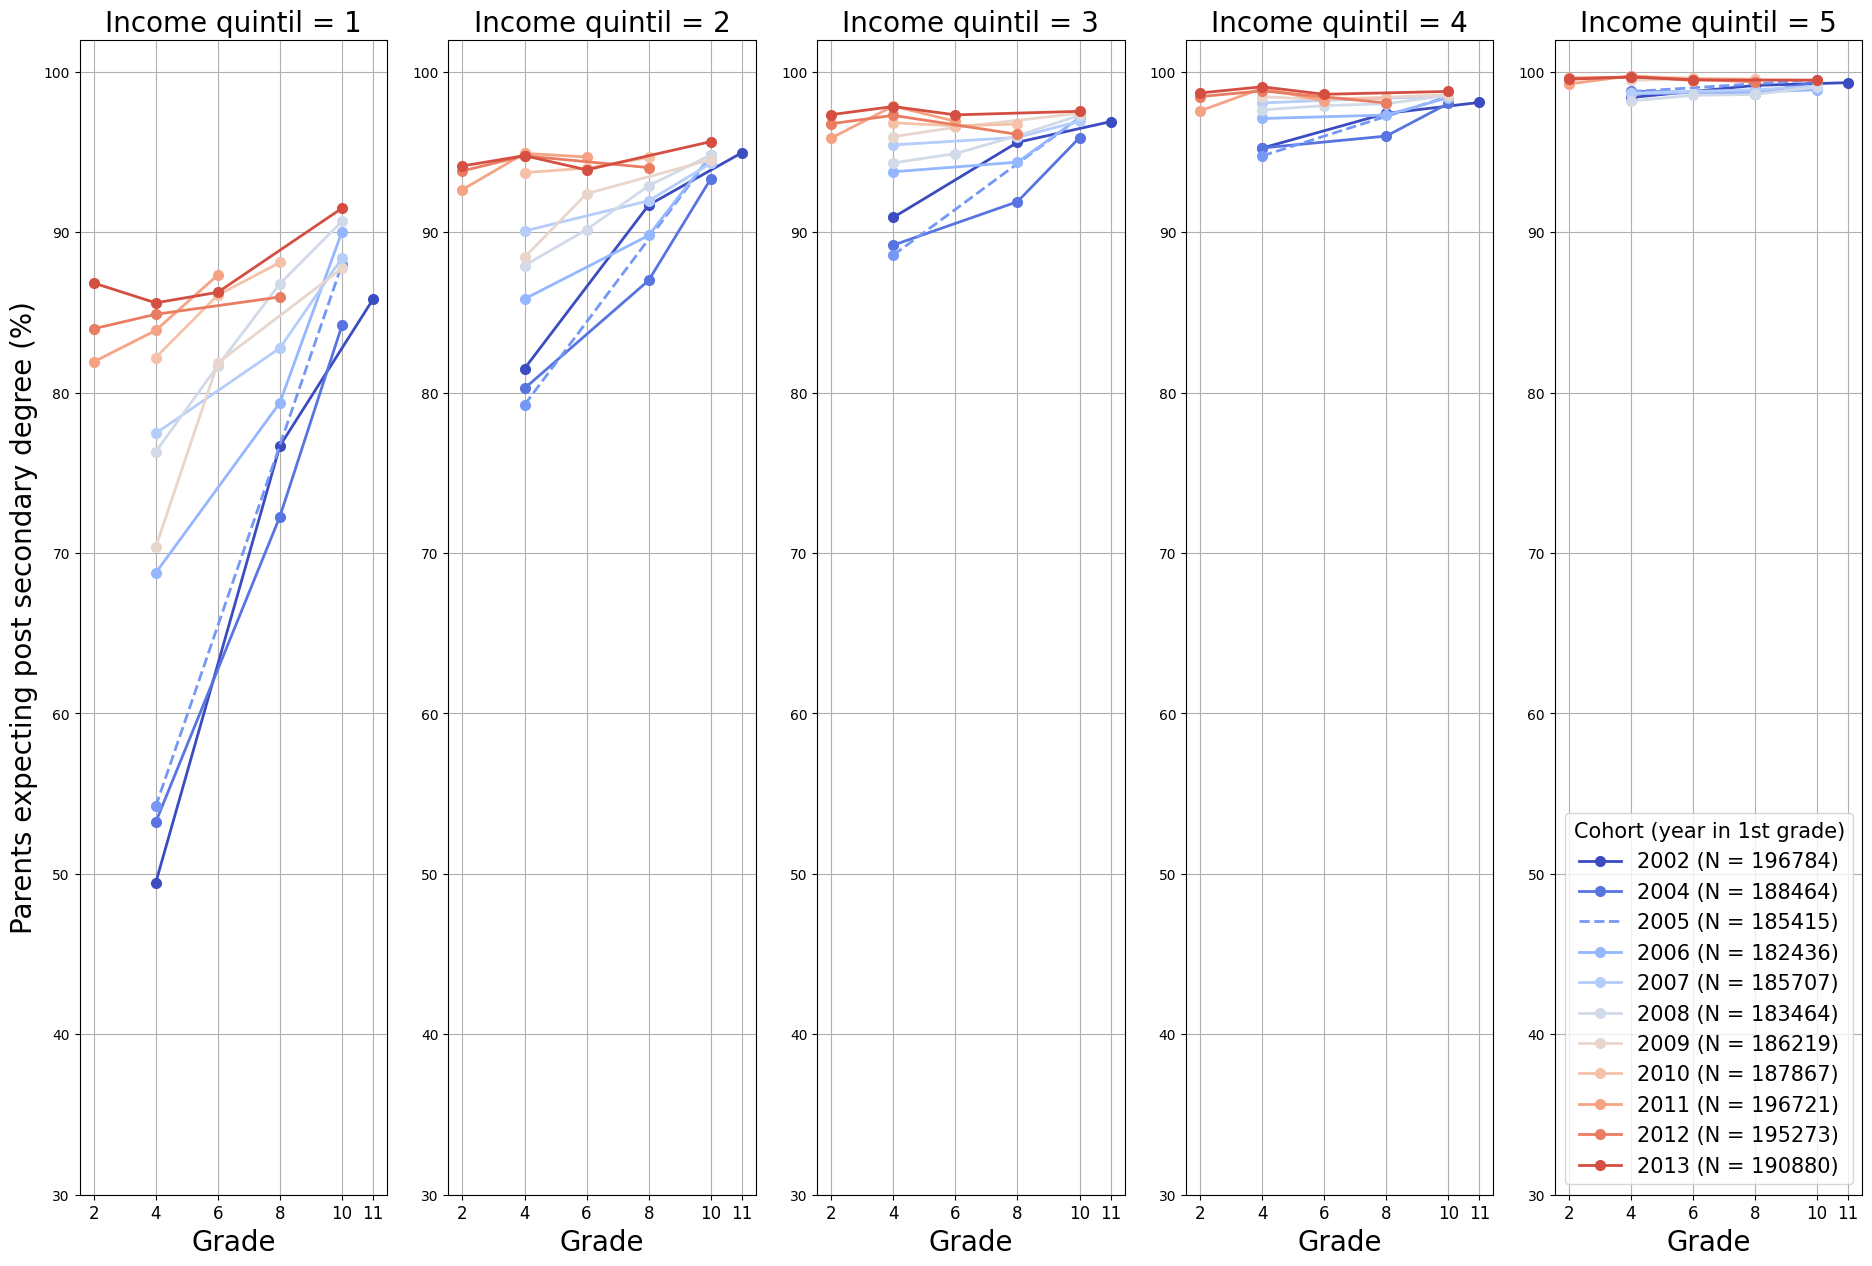

In [127]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(23,15))
for nse in range(1,6):
    data_nse = panel_11cohortes[panel_11cohortes.income_quintil_casen_4b == nse]
    
    c = 1
    for a in range(2002,2014):
        if a != 2003:
            data_curso = data_nse[data_nse.agno_grade1_enrolled == a]
            df = data_curso[['parental_exp_cc_or_more','curso_numeric']].groupby(['curso_numeric'], as_index=False).mean()

            if c != 3:
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'-o',ms=7, lw=2,  label = str(agno_in_1b[c-1])+ ' (N = ' + str(int(N_cohorts[c-1])) + ')',c = colores_deg(c-1))
            else:
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'--',ms=7, lw=2,  label =  str(agno_in_1b[c-1])+ ' (N = ' + str(int(N_cohorts[c-1])) + ')',c = colores_deg(c-1))
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'o',ms=7, lw=2,c = colores_deg(c-1))

            ax[nse-1].set_ylim(30,102)

            ax[nse-1].set_xticks([2,4,6,8,10,11])
            ax[nse-1].set_xticklabels(['2','4','6','8','10','11'],fontsize=12)  
            ax[nse-1].set_xlabel('Grade', fontsize = 20)
            if nse == 1:
                ax[nse-1].set_ylabel('Parents expecting post secondary degree (%)',fontsize =20)
            ax[nse-1].grid(True)
            ax[nse-1].set_title('Income quintil = ' + str(nse), fontsize = 20)

            c+=1
        
plt.legend(fontsize=15, title= 'Cohort (year in 1st grade)',title_fontsize=15)
plt.savefig('Figuras\Figura4_longitudinal_por_cohorte_NSE_casen.png', dpi = 200)
plt.show()

### Quintiles SIMCE

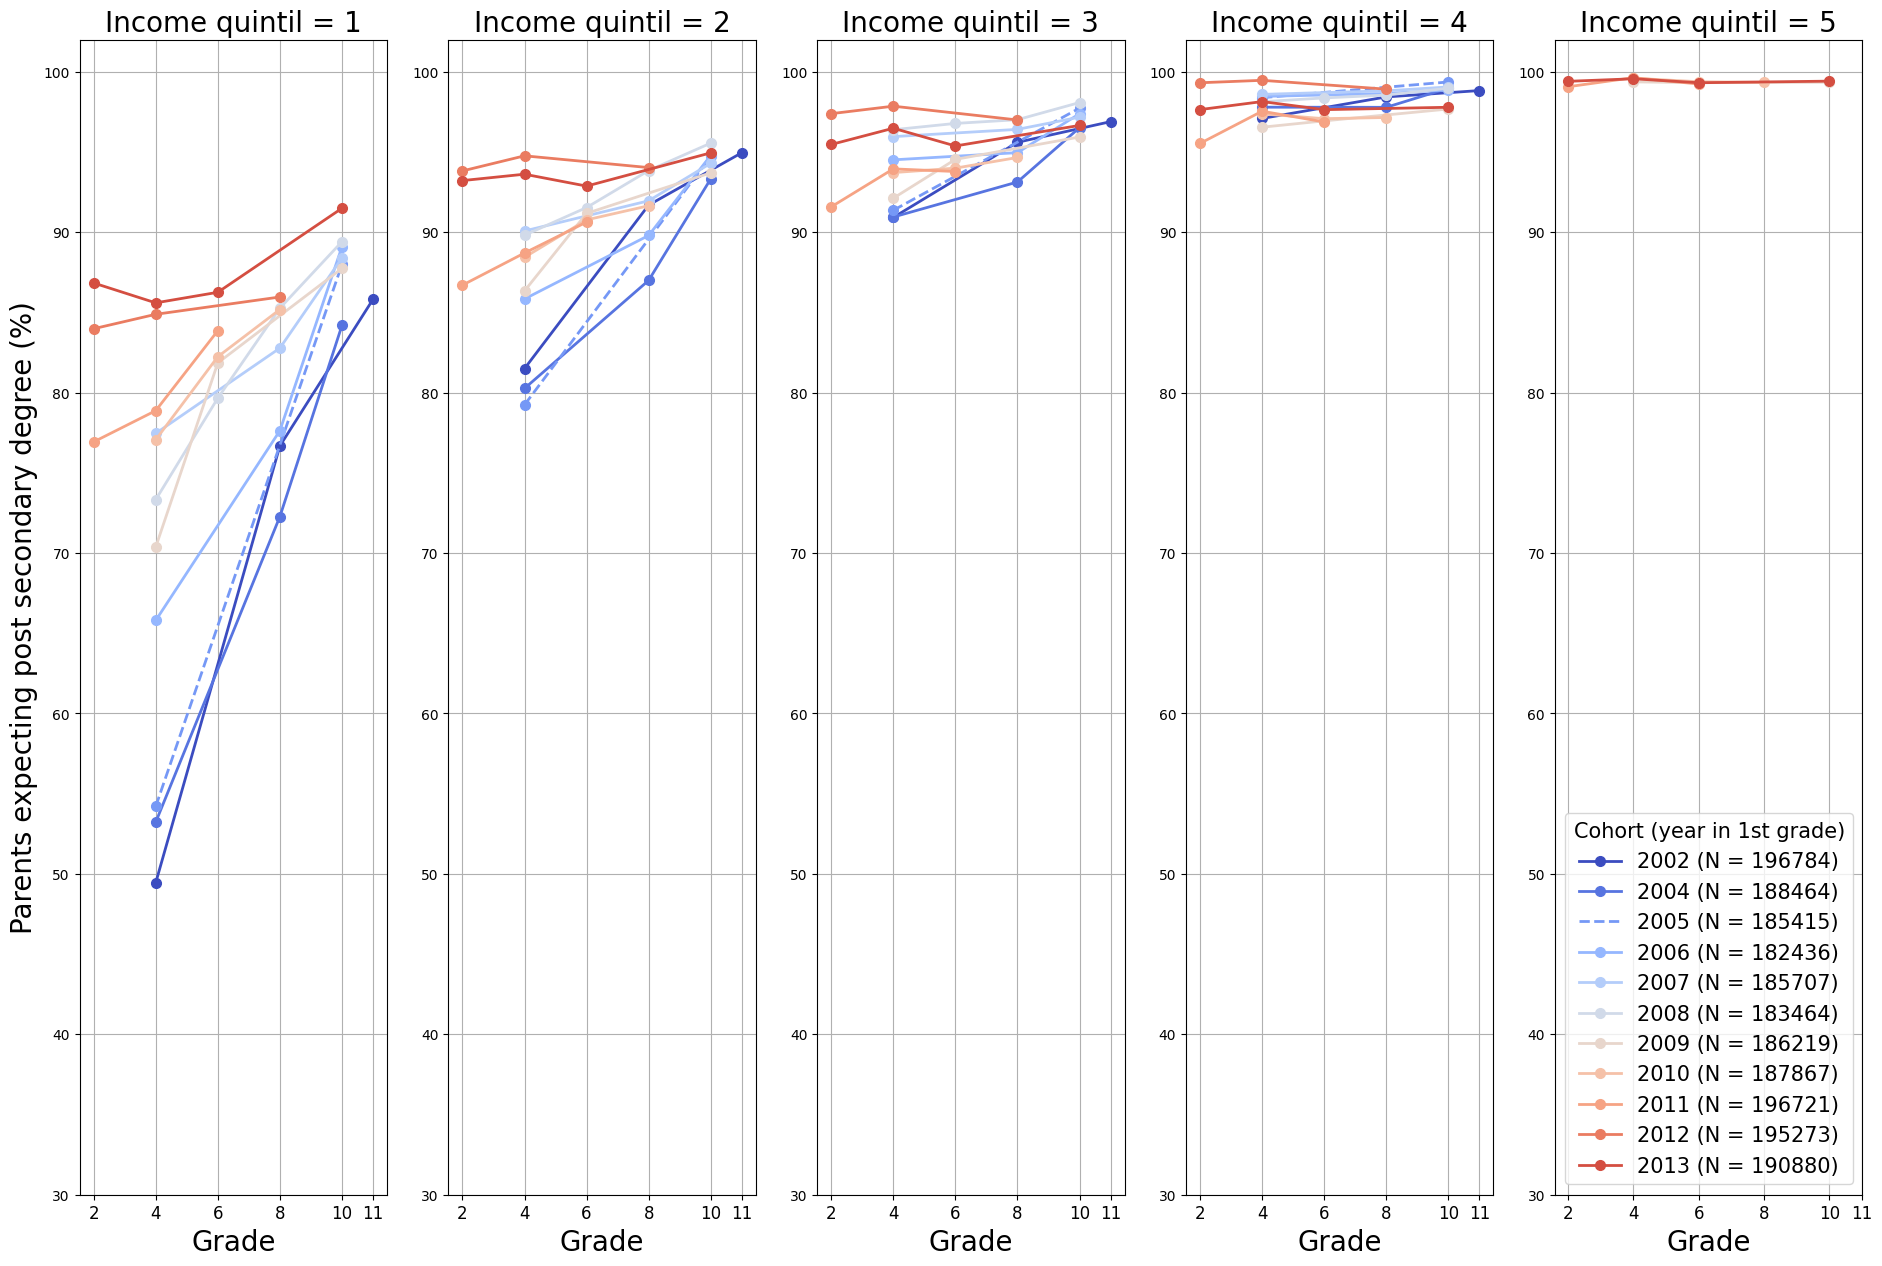

In [128]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(23,15))
for nse in range(1,6):
    data_nse = panel_11cohortes[panel_11cohortes.income_quintil_uf_4b == nse]
    
    c = 1
    for a in range(2002,2014):
        if a != 2003:
            data_curso = data_nse[data_nse.agno_grade1_enrolled == a]
            df = data_curso[['parental_exp_cc_or_more','curso_numeric']].groupby(['curso_numeric'], as_index=False).mean()

            if c != 3:
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'-o',ms=7, lw=2,  label = str(agno_in_1b[c-1])+ ' (N = ' + str(int(N_cohorts[c-1])) + ')',c = colores_deg(c-1))
            else:
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'--',ms=7, lw=2,  label =  str(agno_in_1b[c-1])+ ' (N = ' + str(int(N_cohorts[c-1])) + ')',c = colores_deg(c-1))
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'o',ms=7, lw=2,c = colores_deg(c-1))

            ax[nse-1].set_ylim(30,102)

            ax[nse-1].set_xticks([2,4,6,8,10,11])
            ax[nse-1].set_xticklabels(['2','4','6','8','10','11'],fontsize=12)  
            ax[nse-1].set_xlabel('Grade', fontsize = 20)
            if nse == 1:
                ax[nse-1].set_ylabel('Parents expecting post secondary degree (%)',fontsize =20)
            ax[nse-1].grid(True)
            ax[nse-1].set_title('Income quintil = ' + str(nse), fontsize = 20)

            c+=1
        
plt.legend(fontsize=15, title= 'Cohort (year in 1st grade)',title_fontsize=15)
plt.savefig('Figuras\Figura5_longitudinal_por_cohorte_NSE_simce.png', dpi = 200)
plt.show()

## Gráfico por GPA

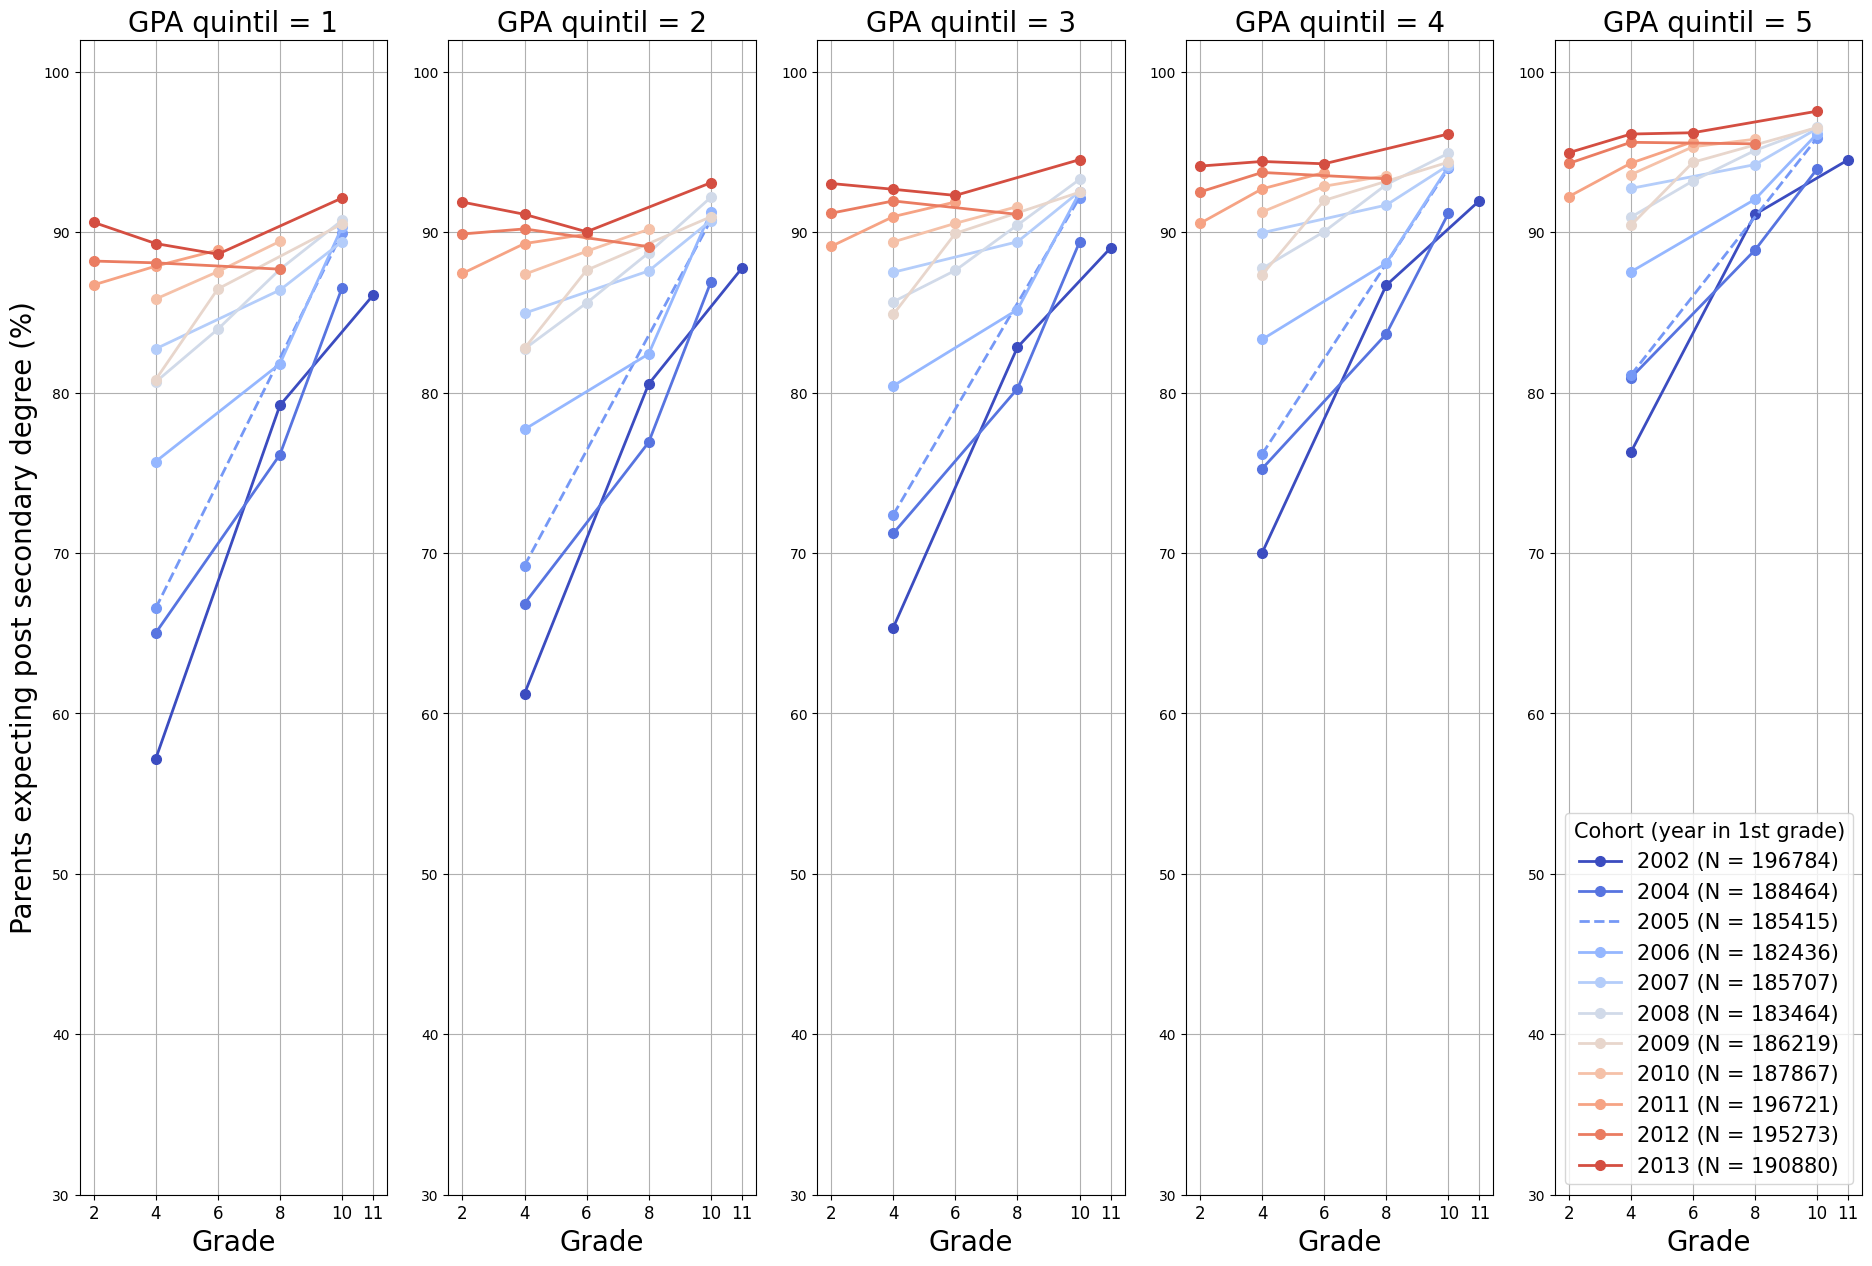

In [131]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(23,15))
for nse in range(1,6):
    data_nse = panel_11cohortes[panel_11cohortes.GPA_quintil_4b == nse]
    
    c = 1
    for a in range(2002,2014):
        if a != 2003:
            data_curso = data_nse[data_nse.agno_grade1_enrolled == a]
            df = data_curso[['parental_exp_cc_or_more','curso_numeric']].groupby(['curso_numeric'], as_index=False).mean()

            if c != 3:
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'-o',ms=7, lw=2,  label = str(agno_in_1b[c-1])+ ' (N = ' + str(int(N_cohorts[c-1])) + ')',c = colores_deg(c-1))
            else:
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'--',ms=7, lw=2,  label =  str(agno_in_1b[c-1])+ ' (N = ' + str(int(N_cohorts[c-1])) + ')',c = colores_deg(c-1))
                ax[nse-1].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'o',ms=7, lw=2,c = colores_deg(c-1))

            ax[nse-1].set_ylim(30,102)

            ax[nse-1].set_xticks([2,4,6,8,10,11])
            ax[nse-1].set_xticklabels(['2','4','6','8','10','11'],fontsize=12)  
            ax[nse-1].set_xlabel('Grade', fontsize = 20)
            if nse == 1:
                ax[nse-1].set_ylabel('Parents expecting post secondary degree (%)',fontsize =20)
            ax[nse-1].grid(True)
            ax[nse-1].set_title('GPA quintil = ' + str(nse), fontsize = 20)

            c+=1
        
plt.legend(fontsize=15, title= 'Cohort (year in 1st grade)',title_fontsize=15)
plt.savefig('Figuras\Figura6_longitudinal_por_cohorte_GPA.png', dpi = 200)
plt.show()

# Gráfico NSE vs GPA

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores_deg = cm.get_cmap('coolwarm',11)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipy

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklab

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_7852\1193614267.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklab

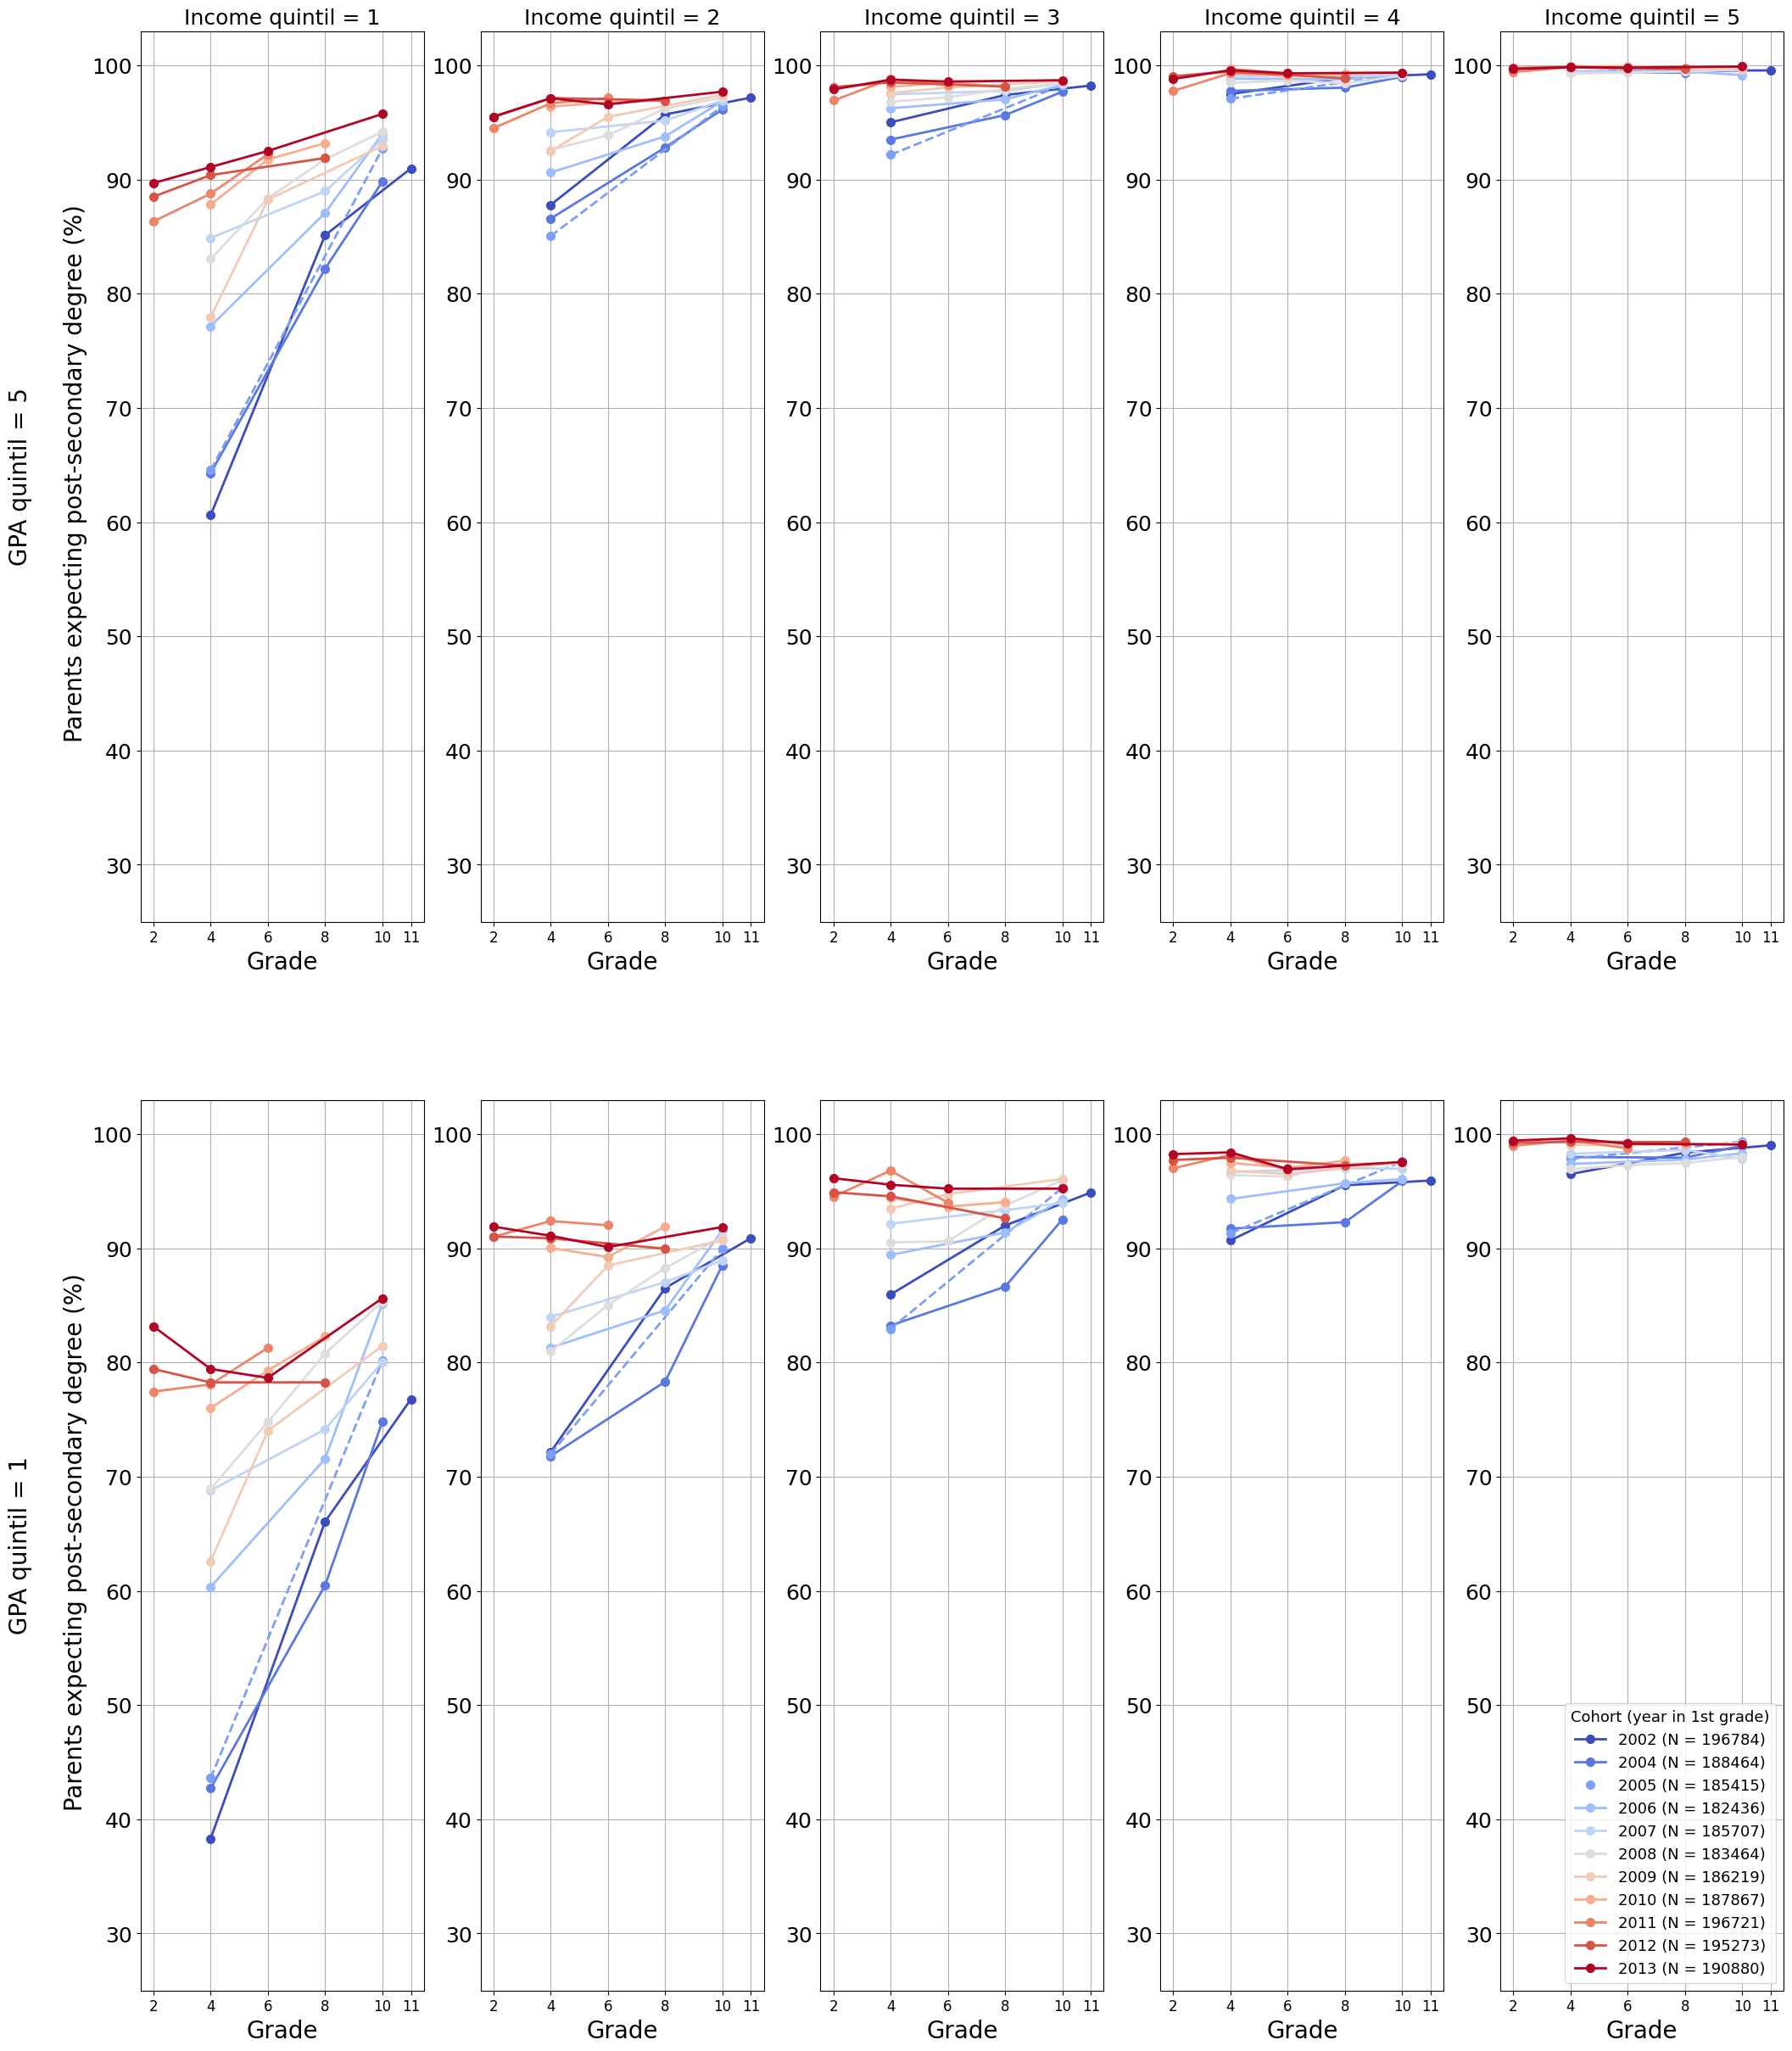

In [147]:
# obtener N de cohortes
df = pd.crosstab(panel_11cohortes.agno_grade1_enrolled, panel_11cohortes.curso_numeric)
df.replace(0, np.nan,inplace=True)
df2 = df.mean(axis = 1)

colores_deg = cm.get_cmap('coolwarm',11)
fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(25,30))
n = 0
for nse in [1,2,3,4,5]:
    data_nse = panel_11cohortes[panel_11cohortes.income_quintil_casen_4b == nse]
    m = 0
    for q in [5,1]:
        data_gpa = data_nse[data_nse.GPA_quintil_4b == q]
        c = 1
        for a in range(2002,2014):
            if a != 2003:
                data_curso = data_gpa[data_gpa.agno_grade1_enrolled == a]
                df = data_curso[['parental_exp_cc_or_more','curso_numeric']].groupby(['curso_numeric'], as_index=False).mean()
                if c != 3:
                    ax[m,n].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'-o',ms=7, lw=2,  label = str(agno_in_1b[c-1]) + ' (N = ' + str(int(df2.loc[a])) + ')' ,c = colores_deg(c-1))
                else:
                    ax[m,n].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'--',ms=7, lw=2,c = colores_deg(c-1))
                    ax[m,n].plot(df.curso_numeric, 100*df.parental_exp_cc_or_more,'o',ms=7, lw=2,  label = str(agno_in_1b[c-1])+ ' (N = ' + str(int(df2.loc[a])) + ')' ,c = colores_deg(c-1))


                #ax[nse-1].plot(df.curso_numeric,# df.pe_cat,'-o',ms=7, lw=2,  label = str(cohort_2b[c-1]),c = colores_deg(c-1))
                ax[m,n].set_ylim(25,103)

                ax[m,n].set_xticks([2,4,6,8,10,11])
                ax[m,n].set_xticklabels(['2','4','6','8','10','11'], fontsize=12)

                ax[m,n].set_xlabel('Grade',fontsize=20)
                if n == 0:
                    ax[m,n].set_ylabel('GPA quintil = ' + str(q) + '\n\n Parents expecting post-secondary degree (%)', fontsize = 20)
                ax[m,n].grid(True)
                ax[m,n].set_yticklabels(range(20,110,10), fontsize=18)
                if m == 0:
                    ax[m,n].set_title('Income quintil = ' + str(nse), fontsize = 18)
                    
                c+=1 
                
        m+=1
    n+=1


plt.legend(fontsize=13, title= 'Cohort (year in 1st grade)',title_fontsize=13, loc = 'lower right')
plt.savefig('Figuras\Figura6_longitudinal_por_cohorte_GPA_vs_NSE_casen.png', dpi = 200)
plt.show()